Implement the method of power iteration to approximate the top 10 PCs from HapMap3 data (see Galinsky et al. 2016a Am J Hum Genet). 


In cases of subtle structure (e.g. 2 populations with low Fst, or a single admixed population), investigate how accuracy of inferred ancestry varies with (a) number of SNPs used, (b) number of samples used, (c) whether or not other populations not relevant to the subtle structure are included in the data set. Discuss. 

*********
First part:
Include all ancestries?
Include all individuals? # does population size matter?
Include all 23 chromosomes?

#rare variants

How large is the data if we use all 23 chromosomes? Should we aim to use SNPs all 23 chromosomes for better accuracy?

(a) how do we assess the accuracy of inferred ancestry? How do we determine the inferred ancestry from PCs? clusters?
(c) other populations not relevant to the subtle structure <- does this mean a population that is very distant to the admixed population?


1. data pre-processing (data selection 1. standardize in some way? large/small population 2. which chromosome (based on number of SNPs) 3. how to handle rare/non-rare SNPs)
2. measures after method (accuracy?)
3. clarification on (c) distant to subtle structure. 


In [6]:
import numpy as np

In [1]:
import sys
sys.path.append('/Users/tinaryu/stat_gen/hw_data') 
#sys.path is a list of directories that Python searches when you use import statement
#append then adds the hw_data to the directories to be searched
from CB_02704 import *

In [2]:
# please set the path to your data directory here
path = "/Users/tinaryu/stat_gen/hw_data/02704_data"

In [3]:
CEU = read_geno_pop_chr('CEU',2) #northern European, USA
YRI = read_geno_pop_chr('YRI',2) ##Yoruba, Nigeria
CHB = read_geno_pop_chr('CHB',2) #Chinese, China

In [9]:
#let's only use 10 samples
CEU10 = [x[:10] for x in CEU.data]
YRI10 = [x[:10] for x in YRI.data]
CHB10 = [x[:10] for x in CHB.data]

combined = CEUGIH = np.hstack((CEU10,YRI10,CHB10))
combined[:3]

array([[2, 9, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2,
        1, 2, 2, 1, 0, 2, 2, 2],
       [2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
        1, 2, 2, 1, 0, 2, 2, 2],
       [0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1,
        2, 0, 0, 1, 2, 2, 0, 2]], dtype=uint8)

make covariance matrix

In [10]:
G = np.matrix(combined).astype(float) #update mtx values to float
#replace all missing values with np.nan for easier data processing
Gnan = np.where(G==9, np.nan, G)

#take the mean of normalized Genotype data to get allele frequency for each SNP
#p is a vector of all the allele frequencies
p = np.nanmean(Gnan/2, axis = 1) #nanmean ignores nan values

#Gsub - G subtracted
p = p.reshape(-1,1) #change array to column vector
Gsub= Gnan-2*p #matrix of mean subtracted for each SNP

#replace all nan values in genotype matrix with 0
Gsub_no_nan = np.nan_to_num(Gsub,nan=0)


#get the stdev
#stdev is a vector of all the SNP stdevs
stdev = (2 * p * (1 - p)) ** (1/2)
#replace all values with stdev == 0 to 1
#note: when each row is divided by the stdev to be normalized the rows with 0 stdev will be just divided by one
stdev[stdev==0] = 1

#normalize by stdev
stdev = stdev.reshape(-1,1)
x = Gsub_no_nan/stdev
x = np.matrix(x)
xt = np.transpose(x)

psi = (xt*x)/(len(G))
psi

matrix([[ 1.04939655,  0.1442113 ,  0.10411023,  0.11942946,  0.1244875 ,
          0.12380159,  0.11804057,  0.11456272,  0.1146421 ,  0.10272657,
         -0.14361319, -0.13266451, -0.13888598, -0.15679204, -0.15140712,
         -0.14640385, -0.17186275, -0.14080115, -0.15866648, -0.15553388,
         -0.05088867, -0.08977696, -0.02483831, -0.05791737, -0.04814767,
         -0.05276294, -0.1029605 , -0.06725751, -0.07351708, -0.05071065],
        [ 0.1442113 ,  1.09756173,  0.10867527,  0.10892971,  0.14451789,
          0.12065713,  0.09416571,  0.13114686,  0.13083088,  0.08051892,
         -0.14486011, -0.12324853, -0.14135088, -0.15646246, -0.13148654,
         -0.14988804, -0.12596964, -0.10752208, -0.1315194 , -0.11832898,
         -0.09552404, -0.08755147, -0.06285281, -0.05877057, -0.11676345,
         -0.09845117, -0.06097272, -0.09149419, -0.05361112, -0.10458719],
        [ 0.10411023,  0.10867527,  1.05267779,  0.11794435,  0.14105985,
          0.11341018,  0.10639867,  

In [12]:
#compute eigenvectors
# Step 1: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(psi)

# Step 2: Sort the eigenvalues and eigenvectors
# Get indices that would sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
# Sort eigenvalues
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 3: Get the top eigenvector (first column of sorted_eigenvectors)
top_eigenvector = sorted_eigenvectors[:, 0:2]

top_eigenvector

matrix([[-0.10660067, -0.23433013],
        [-0.0853288 , -0.25726157],
        [-0.09361405, -0.2364872 ],
        [-0.07702816, -0.253507  ],
        [-0.07508986, -0.26112101],
        [-0.072694  , -0.25402897],
        [-0.08729487, -0.2361123 ],
        [-0.08427606, -0.24177721],
        [-0.09144371, -0.2414551 ],
        [-0.07274008, -0.21806923],
        [ 0.24500503,  0.04633172],
        [ 0.25531724,  0.04539178],
        [ 0.24603935,  0.04404838],
        [ 0.26247304,  0.06212416],
        [ 0.26068594,  0.05285573],
        [ 0.24705898,  0.0517669 ],
        [ 0.25234717,  0.0540975 ],
        [ 0.25801078,  0.03915142],
        [ 0.24524243,  0.04473051],
        [ 0.26070305,  0.04450843],
        [-0.18357074,  0.19845851],
        [-0.15350073,  0.19681768],
        [-0.17507608,  0.17493707],
        [-0.16168475,  0.18325597],
        [-0.17434628,  0.19659756],
        [-0.16124583,  0.22803977],
        [-0.15865129,  0.19433622],
        [-0.17910856,  0.204

In [19]:
PCs = np.array(top_eigenvector)

PCs[:,0]

array([-0.10660067, -0.0853288 , -0.09361405, -0.07702816, -0.07508986,
       -0.072694  , -0.08729487, -0.08427606, -0.09144371, -0.07274008,
        0.24500503,  0.25531724,  0.24603935,  0.26247304,  0.26068594,
        0.24705898,  0.25234717,  0.25801078,  0.24524243,  0.26070305,
       -0.18357074, -0.15350073, -0.17507608, -0.16168475, -0.17434628,
       -0.16124583, -0.15865129, -0.17910856, -0.17089983, -0.16868865])

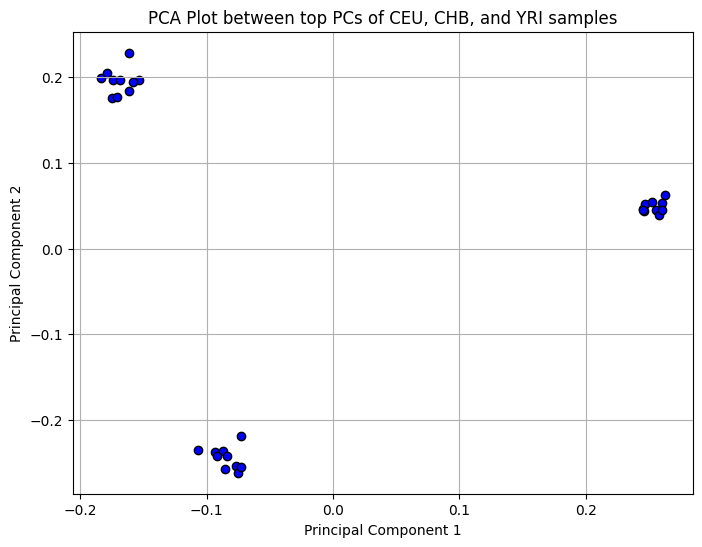

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(PCs[:, 0], PCs[:, 1], c='blue', edgecolor='k')
plt.title("PCA Plot between top PCs of CEU, CHB, and YRI samples")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()